In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', index_col=[0])
Y = data['Факт продаж, заказов']

In [ ]:
data['Предыдущие1'] = list(Y.shift(1))
data['Предыдущие2'] = list(Y.shift(2))
data['Предыдущие3'] = list(Y.shift(3))
data['Предыдущие1'][0] = data['Предыдущие2'][0] = data['Предыдущие3'][0] = 110
data['Предыдущие2'][1] = data['Предыдущие3'][1] = 91
data['Предыдущие3'][2] = 93

# Добавим признак - среднее значение продаж трех предыдущих недель
data['Среднее предыдущих'] = (data['Предыдущие1'] + data['Предыдущие2'] + data['Предыдущие3'])/3
data.drop(['Предыдущие1'], axis=1, inplace=True)
data.drop(['Предыдущие2'], axis=1, inplace=True)
data.drop(['Предыдущие3'], axis=1, inplace=True)

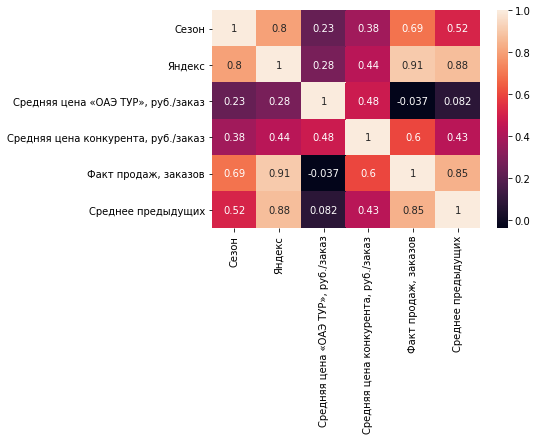

In [4]:
sns.heatmap(data.corr(), annot = True);

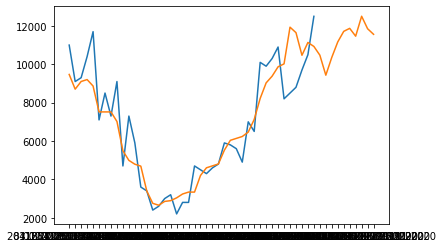

In [5]:
plt.plot(data['Факт продаж, заказов']*100)
plt.plot(data['Яндекс'])
plt.show()

In [6]:
data.drop(['Факт продаж, заказов'], axis=1,  inplace=True)

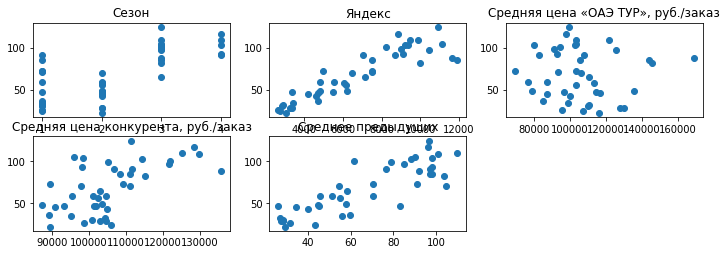

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(data[col], Y)
    plt.title(col);

In [8]:
data['Средняя цена «ОАЭ ТУР», руб./заказ'] = pow(data['Средняя цена «ОАЭ ТУР», руб./заказ'], 2)

In [9]:
val_size = 0.3 # 30% объектов с ответами отложим в валидационную выборку
val_index = int((len(Y) - 10)*(1 - val_size))

In [10]:
X_tr = data.iloc[:val_index]
y_tr = Y[:val_index]
X_val = data.iloc[val_index:len(Y) - 10]
y_val = Y[val_index:len(Y) - 10]

In [11]:
ols = LinearRegression(normalize=True)
ols.fit(X_tr, y_tr)
y_ols_pred = ols.predict(X_val)
r2_score(y_val, y_ols_pred)

0.9286191963514475

In [12]:
alphas = np.logspace(-4, 4, 100)
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_tr, y_tr)
lasso.fit(X_tr, y_tr)
y_lasso_pred = lasso.predict(X_val)
r2_score(y_val, y_lasso_pred)

0.9252812765413041

In [13]:
alphas = np.logspace(-4, 4, 100)
ridge = RidgeCV(alphas=alphas, cv=5, normalize=True).fit(X_tr, y_tr)
ridge.fit(X_tr, y_tr)
y_ridge_pred = ridge.predict(X_val)
r2_score(y_val, y_ridge_pred)

0.938479765865614

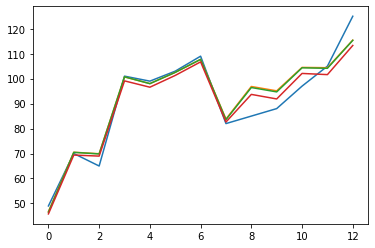

In [14]:
y_val = y_val.reset_index(drop=True)
plt.plot(y_val)
plt.plot(y_lasso_pred)
plt.plot(y_ols_pred)
plt.plot(y_ridge_pred)
plt.show()

In [15]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [16]:
rmse(y_val, y_ridge_pred)

4.876504965735762

In [17]:
# Для теста
test = data[len(Y)-10:]

In [ ]:
for i in range(0, 9):
  l = len(Y) - 10
  Y[l + i] = ridge.predict(test.iloc[i:i + 1])
  test['Среднее предыдущих'][i + 1] = (Y[l + i] + Y[l - 1 + i] + Y[l - 2 + i])/3

In [ ]:
Y[51] = ridge.predict(test.iloc[9:10])

In [20]:
ans = pd.DataFrame({'Факт продаж, заказов' : round(Y[42:52])})
ans = ans.reset_index(drop=True)
ans.to_csv('my_solution.csv', index=False)

In [21]:
ans

,"Факт продаж, заказов"
0,96.0
1,95.0
2,94.0
3,117.0
4,107.0
5,107.0
6,106.0
7,122.0
8,106.0
9,122.0
